In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [5]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<BarContainer object of 30 artists>

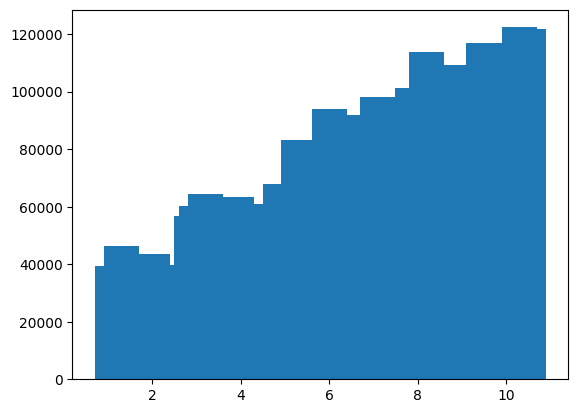

In [15]:
plt.bar(x='YearsExperience',height='Salary', data=df)


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

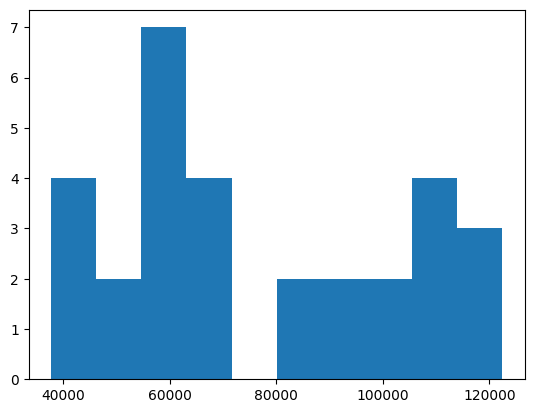

In [18]:
plt.hist('Salary',data=df)

<Axes: xlabel='Salary', ylabel='Count'>

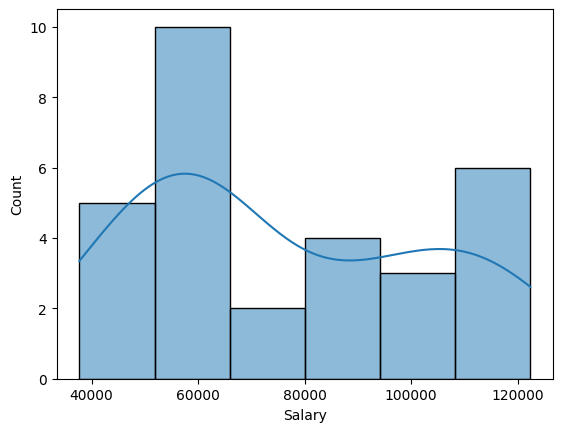

In [21]:
sns.histplot(data=df, x='Salary', kde=True)

<Axes: >

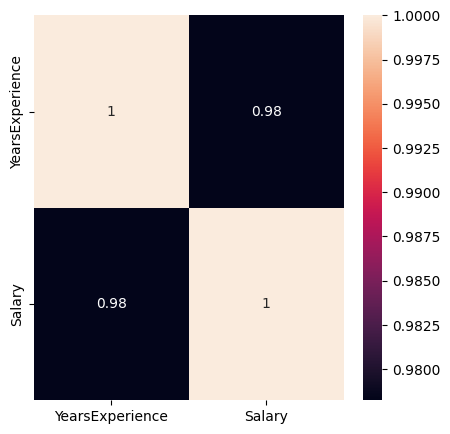

In [30]:
# # Correlation Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True)


In [46]:
import numpy as np
y = df['Salary']
X = df['YearsExperience']
X = np.array(df['YearsExperience']).reshape(-1, 1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,  # Input data
                                                  y,  # output data
                                                  random_state=1234, # it select random samples
                                                  test_size=0.30)

In [48]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((21, 1), (9, 1), (21,), (9,))

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_pred

array([ 55630.13259001,  62221.33017291,  46214.136043  ,  37739.7391507 ,
       122483.70807372,  55630.13259001,  44330.9367336 , 102710.11532501,
        67870.92810111])

In [61]:
from sklearn.metrics import r2_score,mean_squared_error
R2 = r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
#accuracy_score(y_test,y_predictions) # it is a regression tech
print("R-sqaure:",R2)
print("MSE:",MSE)
print("RMSE:",RMSE)

R-sqaure: 0.949721948148016
MSE: 40149896.466138825
RMSE: 6336.39459520466


In [55]:
lr.coef_


array([9415.996547])

In [57]:
lr.intercept_

25498.943639602097

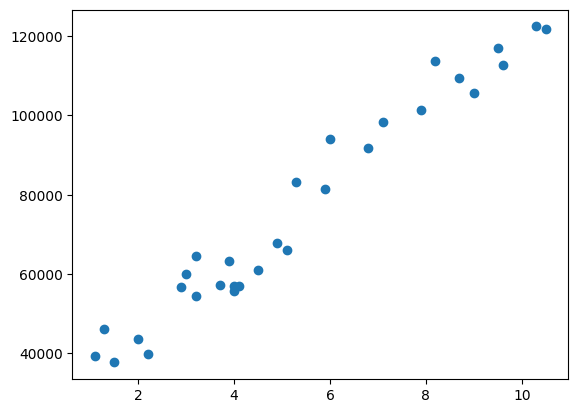

In [58]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [62]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
grid_tree=DecisionTreeRegressor()   # Base model
grid_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
y_pred=grid_tree.predict(X_test)

In [65]:
print(r2_score(y_test,y_pred))

0.9504457217296489


In [66]:
grid_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [67]:
DT_params=[keys for keys in grid_tree.get_params()]
DT_params

['ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'random_state',
 'splitter']

In [89]:
# You need to create dictonary with hyper parameters
param_grid = {
    # "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [98]:
# now these parameters to apply in a DT model
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params 
                           scoring='r2', # metric
                           cv=5,
                          ) # cross validation

In [99]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='r2')

In [102]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0}

In [ ]:
grid_search.best_score_

In [115]:
models = [('Linear Regresion', LinearRegression()),
          ('Gradient Boosting', GradientBoostingRegressor()),
          ('Random Forest', RandomForestRegressor()),
          ('knn', KNeighborsRegressor()),
          ('svr',SVR()),
          ('random',RandomForestRegressor()),
          ('gradient_boosting',GradientBoostingRegressor())
          ]



for model in models: #for loop through the three models
    reg = model[1]  #initialize the model object
    reg.fit(X_train,y_train)  #fitting the training data
    pred = reg.predict(X_test)  #predict target
    print(model[0])
    print('R2: ',r2_score(y_test, pred))  #check r2 score
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))  #check root mean squared error
    print('-'*30)

Linear Regresion
R2:  0.949721948148016
RMSE:  6336.39459520466
------------------------------
Gradient Boosting
R2:  0.9508250796658984
RMSE:  6266.496863023873
------------------------------
Random Forest
R2:  0.9614842041153061
RMSE:  5545.90508159715
------------------------------
knn
R2:  0.9445413296570307
RMSE:  6654.841565857648
------------------------------
svr
R2:  -0.23428754266562857
RMSE:  31395.049127879953
------------------------------
random
R2:  0.9631717607953509
RMSE:  5423.048290932861
------------------------------
gradient_boosting
R2:  0.9508250796658984
RMSE:  6266.496863023873
------------------------------


# Hyperparameter

In [112]:
params = {'max_depth': [7], #np.linspace(1, 10, 10) The maximum depth of the tree
        #   'max_features': ['auto', 'sqrt'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [7], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
          'min_samples_split': [0.1], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
        #   'criterion': ['mse'] #The function to measure the quality of a split
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

tree = rs.best_estimator_
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)


DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=0.1)
R2:  0.8281575991418573
Root Mean Squared Error:  11714.349036049856
